# Classification: an example

### Preamble: imports, definitions, sample generation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

In [ ]:
## our example classification dataset
np.random.seed(10)
num_samples = 50
x1 = np.concatenate([np.random.randint(10, 50, num_samples-10),
                     np.random.randint(10, 20, 10),
                         np.random.randint(30, 100, num_samples//2),
                     np.random.randint(20,40, num_samples//2),
                    ])
x2 = np.concatenate([np.random.randint(10, 50, num_samples-10),
                     np.random.randint(50, 90, 10),
                         np.random.randint(30, 100, num_samples//2),
                     np.random.randint(50,70, num_samples//2),
                     ]) 
X = list(zip(x1, x2))
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
df["y"] = [0 for _ in range(num_samples)] + [1 for _ in range(num_samples)]


In [ ]:
feature_1 = df["feature_1"]
feature_2 = df["feature_2"]
y = df["y"]

In [ ]:
def visualize_decision_boundary(clf, feature_1=feature_1, feature_2=feature_2, y=y, n_steps = 80, cmap="prism", title=None):
  """Visualizing the decision boundary of the clf model"""

  xmin, xmax = feature_1.min(), feature_1.max()
  ymin, ymax = feature_2.min(), feature_2.max()

  xstep = (xmax - xmin)/(n_steps - 1)
  ystep = (ymax - ymin)/(n_steps - 1)

  xs = np.arange(xmin, xmax, xstep)
  ys = np.arange(ymin, ymax, ystep)

  grid_xs, grid_ys = np.meshgrid(xs, ys)

  df_grid = pd.DataFrame({"feature_1": grid_xs.flatten(), "feature_2": grid_ys.flatten()}) # Grid dataframe

  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_grid["pred"] =  clf.predict(df_grid[["feature_1", "feature_2"]].values)

  ax = df_grid.plot.scatter("feature_1", "feature_2", c="pred", cmap=cmap, title=title, colorbar=False, alpha=0.3)
  ax.scatter(feature_1, feature_2, c=y, cmap=cmap, marker="o", s=100)
  
  plt.show()

In [ ]:
def visualize_confidence(clf, feature_1=feature_1, feature_2=feature_2, y=y, n_steps = 80, cmap1="coolwarm", cmap2="prism", title=None):
  n_steps=80
  xmin, xmax = feature_1.min(), feature_1.max()
  ymin, ymax = feature_2.min(), feature_2.max()

  xstep = (xmax - xmin)/(n_steps - 1)
  ystep = (ymax - ymin)/(n_steps - 1)

  xs = np.arange(xmin, xmax, xstep)
  ys = np.arange(ymin, ymax, ystep)

  grid_xs, grid_ys = np.meshgrid(xs, ys)

  df_grid = pd.DataFrame({"feature_1": grid_xs.flatten(), "feature_2": grid_ys.flatten()}) # Grid dataframe

  confidence_function = lambda x: clf.predict_proba(x).max(1)
  confcol = "probability of predicted class"
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_grid[confcol] =  confidence_function(df_grid[["feature_1", "feature_2"]].values)

  ax = df_grid.plot.scatter("feature_1", "feature_2", c=confcol, cmap="coolwarm", title=title, colorbar=True, sharex=False, alpha=0.3)
  ax.scatter(feature_1, feature_2, c=y, cmap="prism", marker="o", s=100)

  plt.show()

### The true labels of our samples

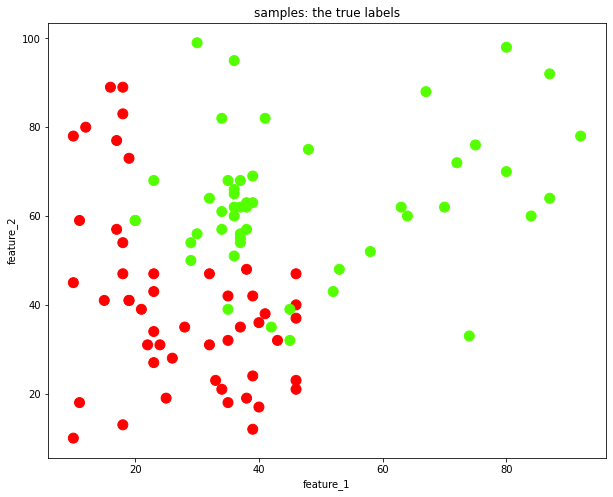

In [ ]:
df.plot.scatter("feature_1", "feature_2", c="y", cmap="prism", marker="o", s=100, colorbar=False, title="samples: the true labels");

## Classifiers' decision boundaries

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df[["feature_1", "feature_2"]], y)

KNeighborsClassifier()

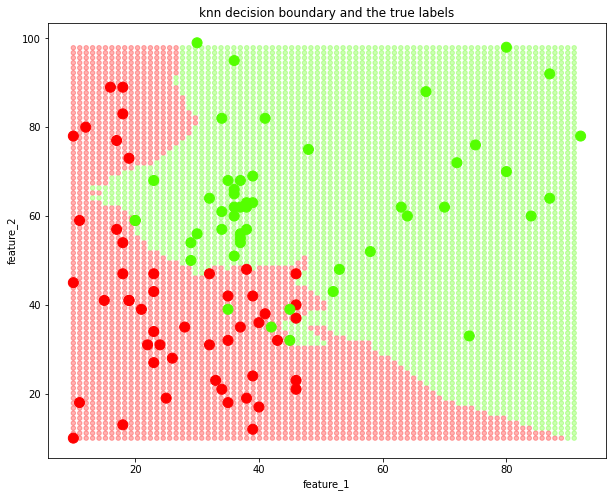

In [ ]:
visualize_decision_boundary(knn, title="knn decision boundary and the true labels")

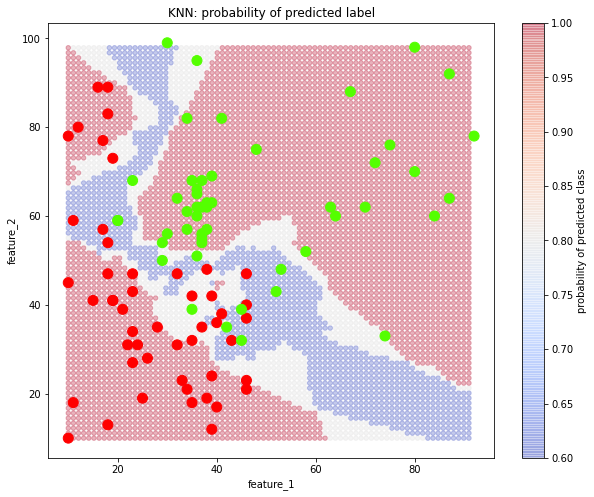

In [ ]:
visualize_confidence(knn, title="KNN: probability of predicted label")

##### A look at the sklearn estimator's predictions

The predicted classes:

In [ ]:
knn.predict(df[["feature_1", "feature_2"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

The predicted probabilities: shape is (n_samples, n_labels), even in binary classification (n_labels=2)

In [ ]:
probas = knn.predict_proba(df[["feature_1", "feature_2"]])
print(probas.shape)

(100, 2)


In [ ]:
print(probas.round(3)[:5])
print("\n...\n")
print(probas.round(3)[-5:])

[[1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]]

...

[[0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]]


Barplot of predicted probabilities for individual samples:

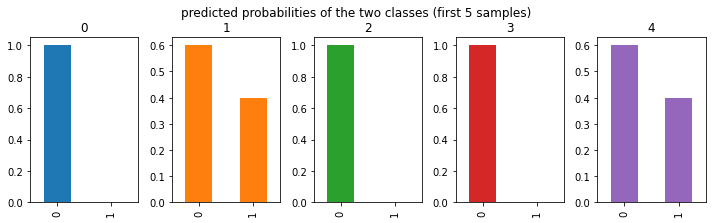

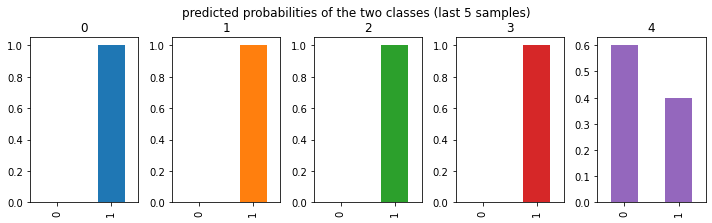

In [ ]:
pd.DataFrame(probas[:5]).T.plot.bar(subplots=True, layout=(-1,5), legend=False, figsize=(10,3))
plt.suptitle("predicted probabilities of the two classes (first 5 samples)", y=1.02)
plt.tight_layout()
plt.show()

pd.DataFrame(probas[-5:]).T.plot.bar(subplots=True, layout=(-1,5), legend=False, figsize=(10,3))
plt.suptitle("predicted probabilities of the two classes (last 5 samples)", y=1.02)
plt.tight_layout()
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(df[["feature_1", "feature_2"]], y)

LogisticRegression(class_weight='balanced')

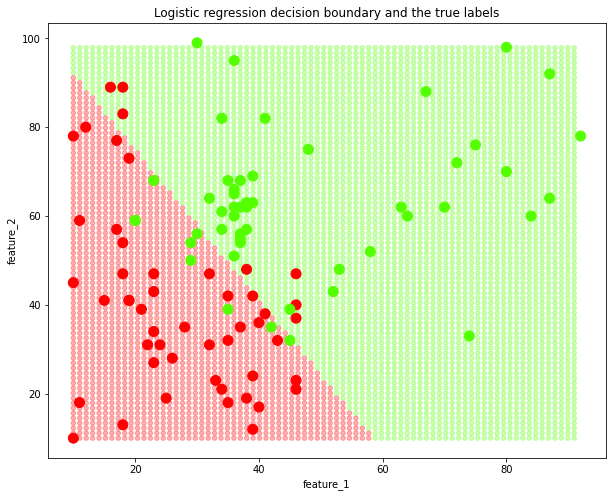

In [ ]:
visualize_decision_boundary(logreg, title="Logistic regression decision boundary and the true labels")

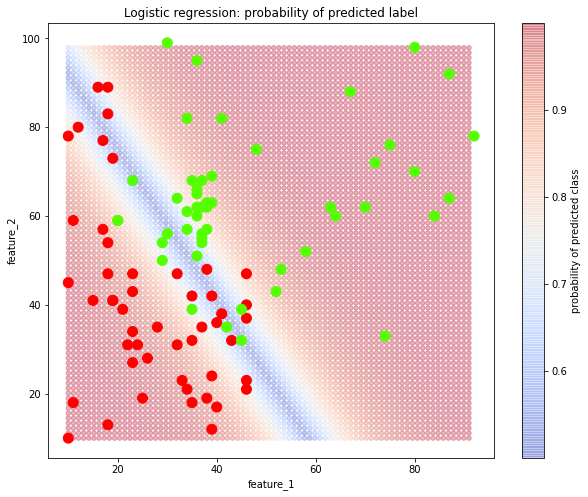

In [ ]:
visualize_confidence(logreg, title="Logistic regression: probability of predicted label")

### SVM: linear

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel="linear", probability=True)
svm_linear.fit(df[["feature_1", "feature_2"]], y)

SVC(kernel='linear', probability=True)

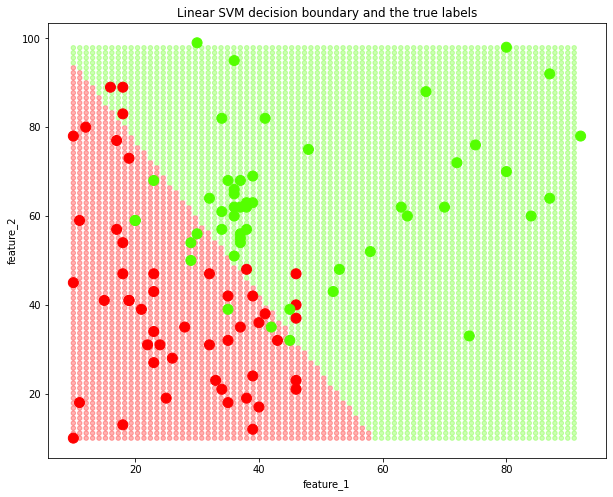

In [ ]:
visualize_decision_boundary(svm_linear, title="Linear SVM decision boundary and the true labels")

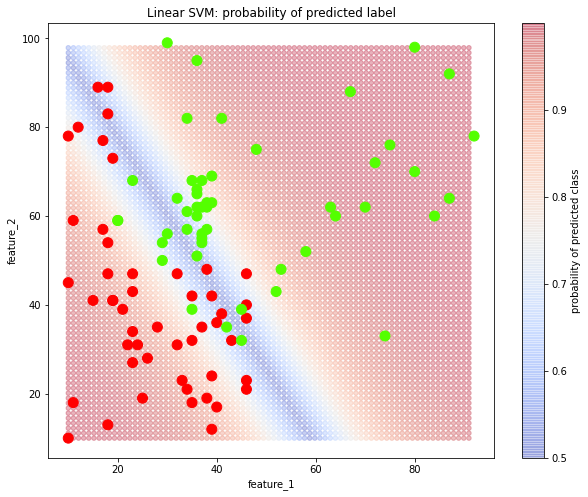

In [ ]:
visualize_confidence(svm_linear, title="Linear SVM: probability of predicted label")

### SVM: polynomial

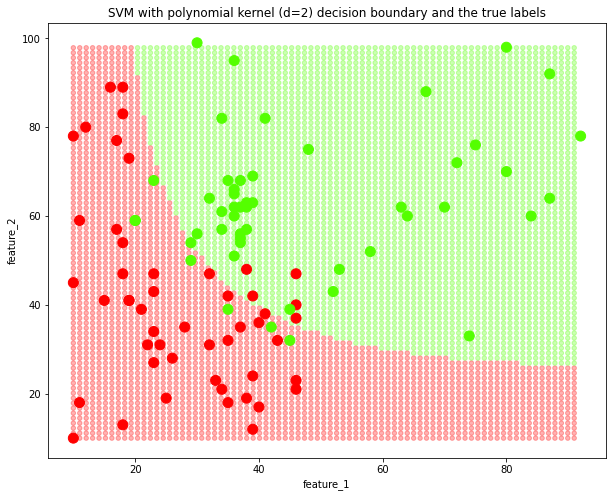

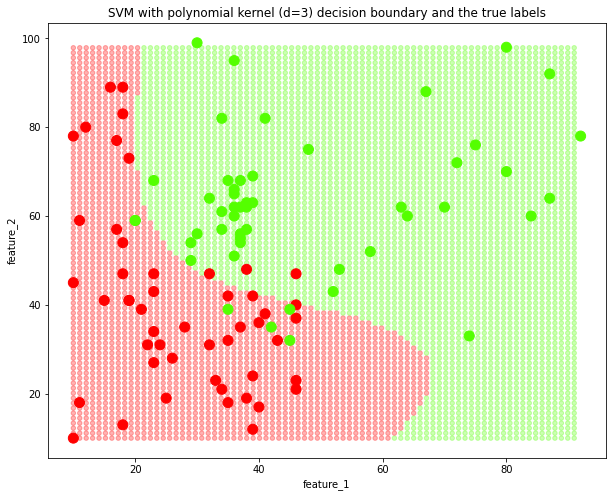

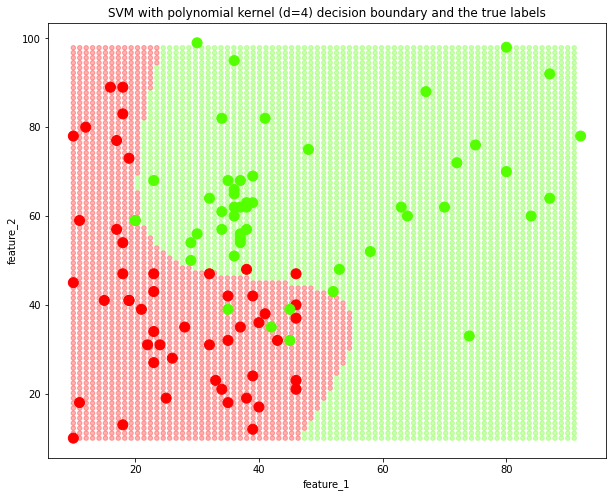

In [ ]:
svm_poly_models = dict()
for degree in [2, 3, 4]:
  svm_poly = SVC(kernel="poly", degree=degree, probability=True)
  svm_poly.fit(df[["feature_1", "feature_2"]], y)
  svm_poly_models.setdefault(degree, svm_poly)
  visualize_decision_boundary(svm_poly, title=f"SVM with polynomial kernel (d={degree}) decision boundary and the true labels")
  #visualize_confidence(svm_poly, title=f"SVM with polynomial kernel (d={degree}) probability of predicted label")

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dectree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=10, class_weight="balanced" )
dectree.fit(df[["feature_1", "feature_2"]], y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       random_state=10)

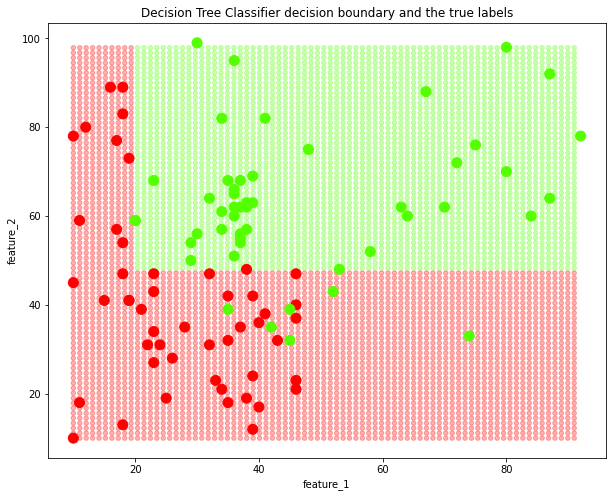

In [ ]:
visualize_decision_boundary(dectree, title="Decision Tree Classifier decision boundary and the true labels")

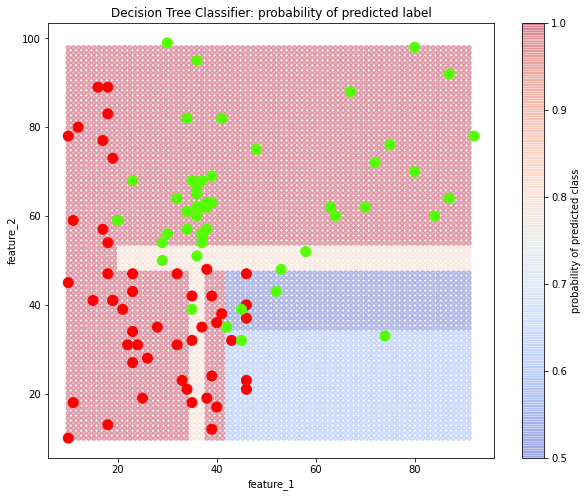

In [ ]:
visualize_confidence(dectree, title="Decision Tree Classifier: probability of predicted label")

The decision tree:


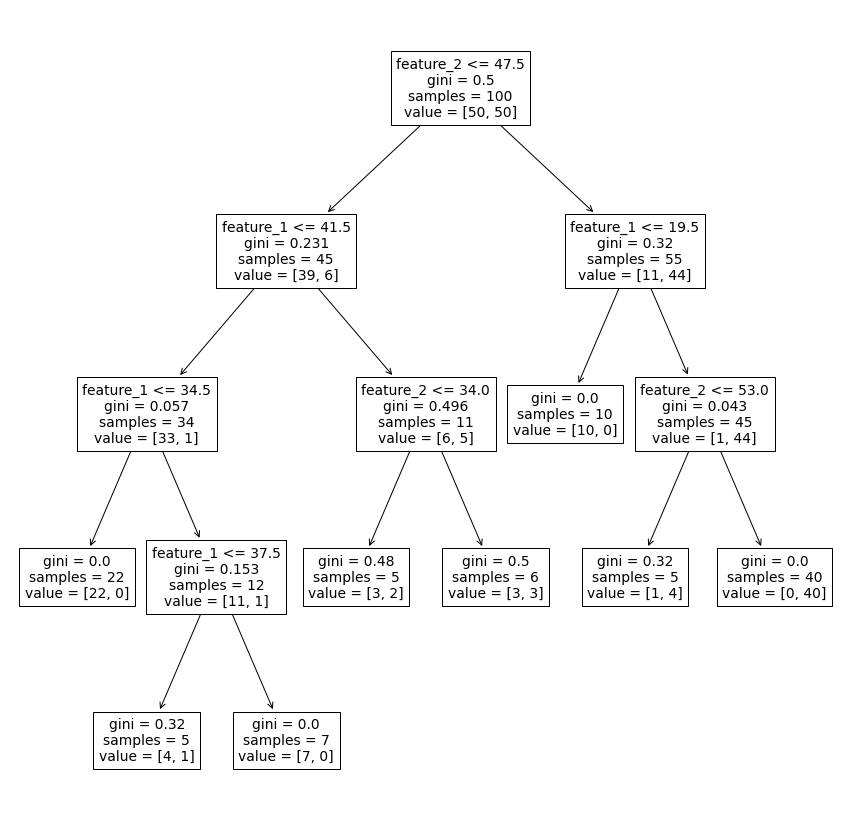

In [ ]:
print("The decision tree:")
plt.figure(figsize=(15,15))
tree.plot_tree(dectree, feature_names=dectree.feature_names_in_)
plt.show()

## Measuring performance

> A good overview of terms: https://en.wikipedia.org/wiki/Confusion_matrix

Important note: here, we are looking at the models' performance on the set of samples they were trained on!

-> We don't know how well they would perform on unseen samples!

In [ ]:
from sklearn import metrics

In [ ]:
df["pred_knn"] = knn.predict(df[["feature_1", "feature_2"]])
df["pred_logreg"] = logreg.predict(df[["feature_1", "feature_2"]])
for d in svm_poly_models.keys():
  df[f"pred_svm_poly{d}"] = svm_poly_models[d].predict(df[["feature_1", "feature_2"]])
df["pred_decisiontree"] = dectree.predict(df[["feature_1", "feature_2"]])

In [ ]:
df

,feature_1,feature_2,y,pred_knn,pred_logreg,pred_svm_poly2,pred_svm_poly3,pred_svm_poly4,pred_decisiontree
0,19,41,0,0,0,0,0,0,0
1,46,47,0,0,1,1,1,1,0
2,25,19,0,0,0,0,0,0,0
3,10,10,0,0,0,0,0,0,0
4,38,48,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
95,38,63,1,1,1,1,1,1,1
96,37,54,1,1,1,1,1,1,1
97,37,56,1,1,1,1,1,1,1
98,36,60,1,1,1,1,1,1,1


In [ ]:
classcolors = {0:"red",1:"green"}
ytrue = df["y"].replace(classcolors)
for modelcol in df.columns:
  if not modelcol.startswith("pred_"):
    continue
  ypred = df[modelcol].replace(classcolors)
  confm = pd.DataFrame(metrics.confusion_matrix(ytrue, ypred, labels=["red", "green"]), index=["red", "green"], columns=["red", "green"])
  confm.index.name = "true"
  confm.columns.name = modelcol
  print(f'\nConfusion matrix for {modelcol.replace("pred_", "")}:')
  display(confm)
  print(f'\nClassification report for {modelcol.replace("pred_", "")}:')
  print(metrics.classification_report(ytrue, ypred, labels=["red", "green"]))
  print("---------")


Confusion matrix for knn:


pred_knn,red,green
true,,
red,50,0
green,6,44



Classification report for knn:
              precision    recall  f1-score   support

         red       0.89      1.00      0.94        50
       green       1.00      0.88      0.94        50

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100

---------

Confusion matrix for logreg:


pred_logreg,red,green
true,,
red,43,7
green,9,41



Classification report for logreg:
              precision    recall  f1-score   support

         red       0.83      0.86      0.84        50
       green       0.85      0.82      0.84        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

---------

Confusion matrix for svm_poly2:


pred_svm_poly2,red,green
true,,
red,45,5
green,8,42



Classification report for svm_poly2:
              precision    recall  f1-score   support

         red       0.85      0.90      0.87        50
       green       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

---------

Confusion matrix for svm_poly3:


pred_svm_poly3,red,green
true,,
red,47,3
green,6,44



Classification report for svm_poly3:
              precision    recall  f1-score   support

         red       0.89      0.94      0.91        50
       green       0.94      0.88      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

---------

Confusion matrix for svm_poly4:


pred_svm_poly4,red,green
true,,
red,48,2
green,6,44



Classification report for svm_poly4:
              precision    recall  f1-score   support

         red       0.89      0.96      0.92        50
       green       0.96      0.88      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

---------

Confusion matrix for decisiontree:


pred_decisiontree,red,green
true,,
red,49,1
green,6,44



Classification report for decisiontree:
              precision    recall  f1-score   support

         red       0.89      0.98      0.93        50
       green       0.98      0.88      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

---------


### Receiver operating characteristic curve (ROC) and area under curve (AUC)

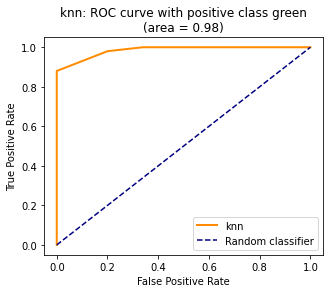

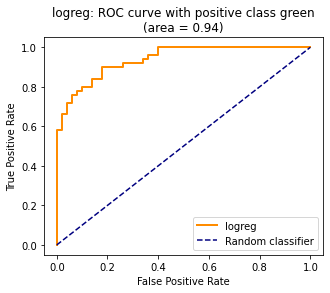

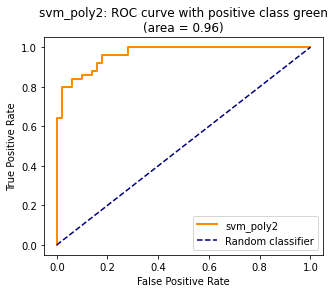

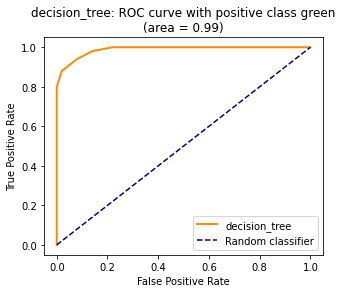

In [ ]:
for modelname, clf in [("knn", knn),
                       ("logreg", logreg),
                       ("svm_poly2", svm_poly_models[2]),
                       ("decision_tree", dectree),
                       ]:
    vals = clf.predict_proba(df[["feature_1", "feature_2"]])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(df["y"].nunique()):
        fpr[i], tpr[i], _ = metrics.roc_curve(df["y"].values, vals[:,i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    fig, ax = plt.subplots( figsize=(5,4))
    i = 1
    label = ["red", "green"][i]
    ax.plot(
        fpr[i],
        tpr[i],
        color="darkorange",
        lw=2,
        label=modelname,
    )
    ax.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random classifier")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"{modelname}: ROC curve with positive class {label}\n" + "(area = %0.2f)" % roc_auc[i])
    ax.legend(loc="lower right")
    plt.show()

$$\text{True Positive Rate (TPR)} = \frac{TP}{\text{actual P}}$$

$$\text{False Positive Rate (FPR)} = \frac{FP}{\text{actual N}}$$

### A different, smaller example

In [ ]:
df2 = pd.DataFrame({"true": [0 , 0 , 1 , 0 , 1] ,
                    "pred_proba": [0.2 , 0.5 , 0.6 , 0.6 , 0.7 ],})
n_samples = len(df2)
thresholds = sorted(df2["pred_proba"].unique())
for threshold in  thresholds:
  df2[f"pred (thr. {threshold})"] = (df2["pred_proba"] >= threshold).astype("int")

df2.loc[""] = np.NaN
df2.loc["accuracy"] = {f"pred (thr. {threshold})": round(metrics.accuracy_score(df2.iloc[:n_samples]["true"], df2.iloc[:n_samples][f"pred (thr. {threshold})"]), 4 ) for threshold in thresholds}
df2.loc["precision"] = {f"pred (thr. {threshold})": round(metrics.precision_score(df2.iloc[:n_samples]["true"], df2.iloc[:n_samples][f"pred (thr. {threshold})"]), 4 ) for threshold in thresholds }
df2.loc["recall"] = {f"pred (thr. {threshold})": round(metrics.recall_score(df2.iloc[:n_samples]["true"], df2.iloc[:n_samples][f"pred (thr. {threshold})"]), 4 ) for threshold in thresholds }
df2.loc[" "] = np.NaN
df2.loc["# positive"] = df2.iloc[:n_samples].sum().drop("pred_proba").astype("int").to_dict()
df2.loc["# negative"] = n_samples - df2.loc["# positive"]

df2.loc["TP"] = df2[(df2["true"]==1)].sum().drop(["true", "pred_proba"]).astype("int").to_dict()
df2.loc["FP"] = df2[(df2["true"]==0)].sum().drop(["true", "pred_proba"]).astype("int").to_dict()

display(df2.fillna(""))

,true,pred_proba,pred (thr. 0.2),pred (thr. 0.5),pred (thr. 0.6),pred (thr. 0.7)
0,0.0,0.2,1.0,0.0,0.0,0.0
1,0.0,0.5,1.0,1.0,0.0,0.0
2,1.0,0.6,1.0,1.0,1.0,0.0
3,0.0,0.6,1.0,1.0,1.0,0.0
4,1.0,0.7,1.0,1.0,1.0,1.0
,,,,,,
accuracy,,,0.4,0.6,0.8,0.8
precision,,,0.4,0.5,0.6667,1.0
recall,,,1.0,1.0,1.0,0.5
,,,,,,


*Which threshold(s) would make sense to choose?*